In [ ]:
pip install -r ./requirements.txt

# Import Required Libraries
Import the necessary libraries, including pandas, matplotlib, and seaborn.

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Read COVID Data
Load the COVID data from a reliable source and read it into a pandas DataFrame.

In [8]:
import pandas as pd

def load_data_from_url(url):
    """
    Load data from a given URL using pandas.

    Parameters:
    url (str): The URL where the data is located.

    Returns:
    pandas.DataFrame: The loaded data as a DataFrame.
    """
    df = pd.read_csv(url)
    return df

# Define the URL where the data is located
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"

# Use the function to load the data from the URL
df = load_data_from_url(url)

# Show the first few rows
df.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


# Data Cleaning
Clean the data by handling missing values, removing duplicates, and converting data types if necessary.

In [3]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}\n")

# If there are missing values, fill them with appropriate values
# For example, if 'cases' column has missing values, we might want to fill them with 0
# df['cases'].fillna(0, inplace=True)

# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows = {duplicates.sum()}\n")

# If there are duplicates, we need to remove them
# df.drop_duplicates(inplace=True)

# Convert data types if necessary
# For example, if 'date' column is not of datetime type, convert it
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the state of Washington
df_washington = df[df['state'] == 'Washington']

# Display the first few rows of the cleaned DataFrame
df_washington.head()

Missing values in each column:
date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

Number of duplicate rows = 0



,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0


# Filter Data for Washington State
Filter the data to include only the records for the state of Washington.

In [4]:
# Filter the data for the state of Washington
df_washington = df[df['state'] == 'Washington']

# Display the first few rows of the cleaned DataFrame
df_washington.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0


# Analyze and Visualize Trends
Analyze the data to identify trends and visualize these trends using matplotlib and seaborn.

/tmp/ipykernel_6015/2488352979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_washington['new_cases'] = df_washington['cases'].diff()
/tmp/ipykernel_6015/2488352979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_washington['new_deaths'] = df_washington['deaths'].diff()
/tmp/ipykernel_6015/2488352979.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

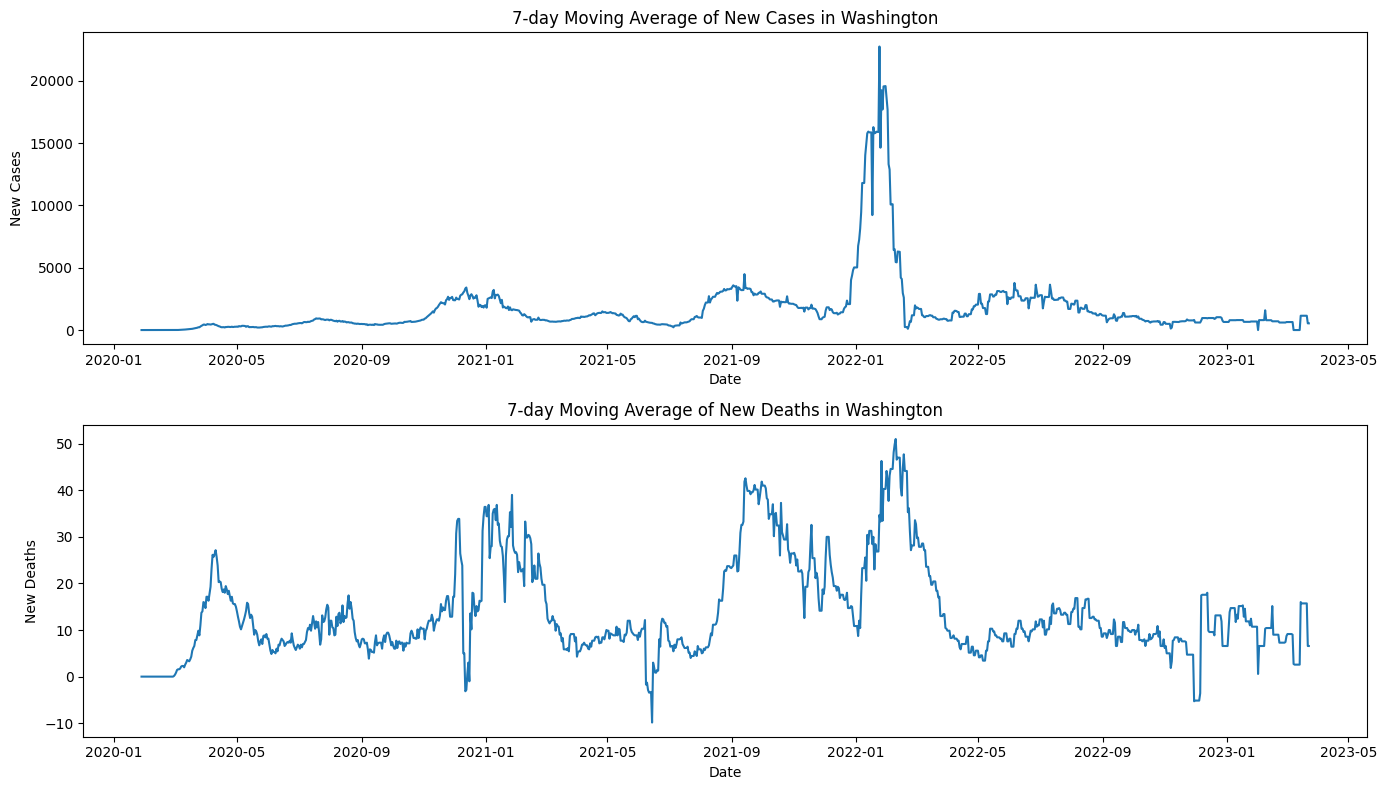

In [7]:
# Analyze the data to identify trends
# Calculate the daily new cases and new deaths
df_washington['new_cases'] = df_washington['cases'].diff()
df_washington['new_deaths'] = df_washington['deaths'].diff()

# Calculate the 7-day moving average of new cases and new deaths
df_washington['new_cases_ma7'] = df_washington['new_cases'].rolling(window=7).mean()
df_washington['new_deaths_ma7'] = df_washington['new_deaths'].rolling(window=7).mean()

# Visualize the trends
plt.figure(figsize=(14, 8))

# Plot new cases
plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='new_cases_ma7', data=df_washington)
plt.title('7-day Moving Average of New Cases in Washington')
plt.xlabel('Date')
plt.ylabel('New Cases')

# Plot new deaths
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='new_deaths_ma7', data=df_washington)
plt.title('7-day Moving Average of New Deaths in Washington')
plt.xlabel('Date')
plt.ylabel('New Deaths')

plt.tight_layout()
plt.show()